# Ejercicio de control

In [28]:
import numpy as np

# Hyperparameters: 
sigma = 10 
rho = 99.96 #28
beta = 8/3

# Condiciones iniciales:
x0 = 1
y0 = 0
z0 = 1

def F(t,ys):
    x = ys[0]
    y = ys[1]
    z = ys[2]
    return np.array([sigma*(y-x),x*(rho-z)-y,x*y-beta*z])

condiciones_iniciales = np.array([x0,y0,z0])

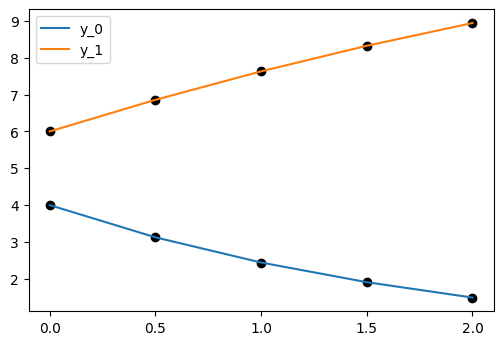

x	y_0	y_1	
0.0	4.0	6.0	
0.5	3.125	6.8575	
1.0	2.4414	7.631	
1.5	1.9073	8.3246	
2.0	1.4901	8.9432	


In [1]:
from edo import ODE_RK_Solver
import numpy as np

def F(t,ys):
    x = ys[0]
    y = ys[1]
    return np.array([-0.5*x,4-0.3*y-0.1*x])

condiciones_iniciales = np.array([4,6])

solver = ODE_RK_Solver(f=F,order=2,n_eqs=2,a2=0.4)
solver.fit(a=0,b=2,
            y0=condiciones_iniciales,
            h=0.5)
solver.plot(plot_nodes=True)
solver.table()

In [20]:
import numpy as np

def F(t,ys):
    x = ys[0]
    y = ys[1]
    return np.array([-0.5*x,4-0.3*y-0.1*x])

condiciones_iniciales = np.array([4,6])

In [21]:
def runge_kutta_vectorial(f,a,b,h,y0):
    n_eqs = y0.shape[0]
    n = int((b-a)/h)
    xs = np.linspace(a,b,n+1)  # variables independientes
    ys = np.zeros(shape=(n_eqs,xs.shape[0]))
    ys[:,0] = y0
    for j in range(1,n+1):
        k1 = f(xs[j-1],ys[:,j-1])
        k2 = f(xs[j-1]+0.5*h,ys[:,j-1]+0.5*k1*h)
        k3 = f(xs[j-1]+h,ys[:,j-1]-k1*h + 2*k2*h)
        ys[:,j] = ys[:,j-1] + (1/6)*(k1 + 4*k2+k3)*h
    return xs,ys

In [30]:
X, Y = runge_kutta(f=F,a=0,b=5,
            y0=condiciones_iniciales,
            h=0.01)

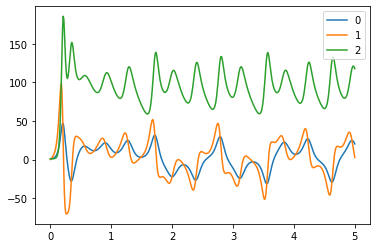

In [32]:
import matplotlib.pyplot as plt

plt.figure()
for j in range(condiciones_iniciales.shape[0]):
    plt.plot(X,Y[j,:],label=str(j))
    # plt.scatter(X,Y[j,:])
plt.legend()
plt.show()

# Modelo SIR

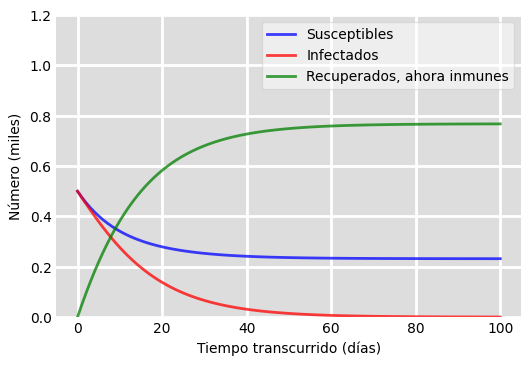

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


N = 1000            # Población total
I0, R0 = 500,0      # Normal = 1,0 # Initial number of infected and recovered individuals, I0 and R0.
S0 = N - I0 - R0    # Everyone else, S0, is susceptible to infection initially.
beta, gamma = 0.1, 1./10 #5, 1./200 # Normal = 0.1, 1/10 # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# A grid of time points (in days)
num_days = 100
t = np.linspace(0, num_days, num_days)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',dpi=100)
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.75, lw=2, label='Susceptibles')
ax.plot(t, I/1000, 'r', alpha=0.75, lw=2, label='Infectados')
ax.plot(t, R/1000, 'g', alpha=0.75, lw=2, label='Recuperados, ahora inmunes')
ax.set_xlabel('Tiempo transcurrido (días)')
ax.set_ylabel('Número (miles)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


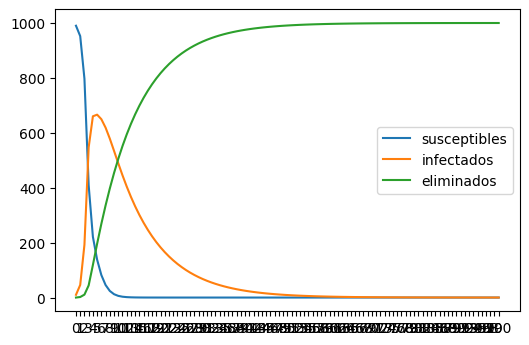

In [35]:
N = 1000            # Población total
I0, R0 = 10, 0      # Normal = 1,0 # Initial number of infected and recovered individuals, I0 and R0.
S0 = N - I0 - R0    # Everyone else, S0, is susceptible to infection initially.
beta, gamma = 2, 0.1
# A grid of time points (in days)
num_days = 100
t = np.linspace(0, num_days, num_days)

def F(t,ys):
    S = ys[0]
    I = ys[1]
    R = ys[2]
    return np.array([-beta*S*I/N, beta*S*I/N-gamma*I,gamma*I])

condiciones_iniciales = np.array([S0, I0, R0])

solver = EDO_RK_Solver(f=F,order=2,n_eqs=3,a2=0.5)
solver.fit(a=0,b=100,
            y0=condiciones_iniciales,
            h=1)
solver.plot(labels=['susceptibles','infectados','eliminados'],plot_nodes=False)

# Lotka-Volterra Equations

* $x$: población de presas
* $y$: población de depredadores
* $\alpha$: tasa de reproducción de presas
* $\beta$: tasa con la que son cazadas las presas
* $\delta$: tasa con la que cazan los depredadores
* $\gamma$: tasa con la que se reproducen los depredadores

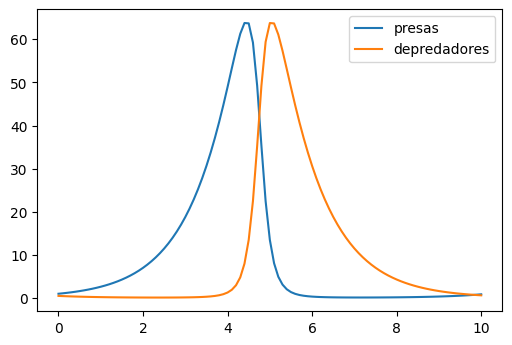

In [19]:
from edo import ODE_RK_Solver
import numpy as np

def F(t,ys):
    x = ys[0]
    y = ys[1]
    alpha = 1
    beta = 0.1
    delta = 0.1
    gamma = 1
    return np.array([alpha*x-beta*x*y,delta*x*y-gamma*y])

condiciones_iniciales = np.array([1,0.5])

solver = ODE_RK_Solver(f=F,order=2,n_eqs=2)
solver.fit(a=0,b=10,
            y0=condiciones_iniciales,
            h=0.1)
solver.plot(labels=['presas','depredadores'],plot_nodes=False)
# solver.table()

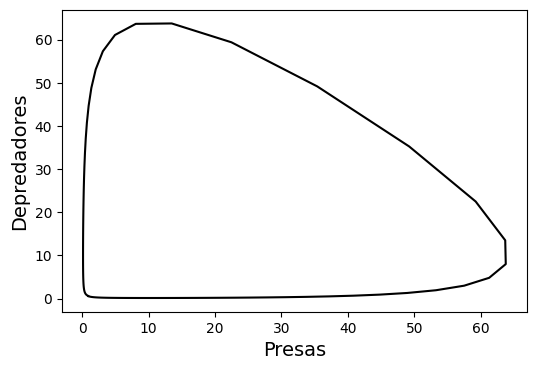

In [20]:
import matplotlib.pyplot as plt

presas = solver.ys[0,:]
depredadores = solver.ys[1,:]

plt.figure(dpi=100)
plt.plot(presas,depredadores,color='black')
plt.xlabel("Presas",fontsize=14)
plt.ylabel("Depredadores",fontsize=14)
plt.show()

# Atractor de Lorentz

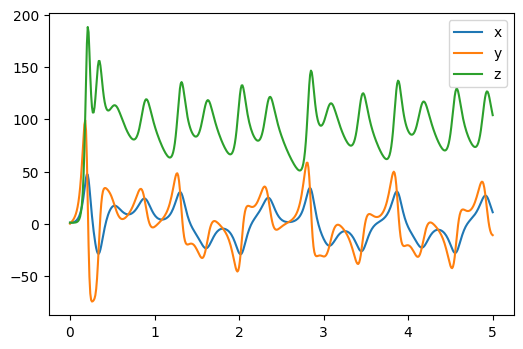

In [21]:
import numpy as np
from edo import ODE_RK_Solver

# Hyperparameters: 
sigma = 10 
rho = 99.96 #28
beta = 8/3

# Condiciones iniciales:
x0 = 1
y0 = 0
z0 = 1

def F(t,ys):
    x = ys[0]
    y = ys[1]
    z = ys[2]
    return np.array([sigma*(y-x),x*(rho-z)-y,x*y-beta*z])

condiciones_iniciales = np.array([x0,y0,z0])

solver = ODE_RK_Solver(f=F,order=2,n_eqs=3,a2=0.5)
solver.fit(a=0,b=5,
            y0=condiciones_iniciales,
            h=0.01)
solver.plot(labels=['x','y','z'],plot_nodes=False)

Retrato Fase

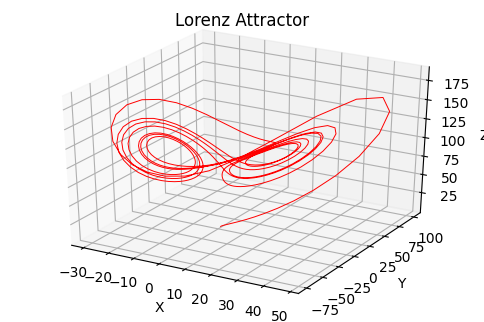

In [22]:
import matplotlib.pyplot as plt

xs = solver.ys[0,:]
ys = solver.ys[1,:]
zs = solver.ys[2,:]

ax = plt.figure(dpi=100).add_subplot(projection='3d')

ax.plot(xs,ys,zs, lw=0.7,color='red')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

plt.show()